# Hypothesis  
- H0 : There is no relationship between work setting and the average pay  
- H1 : There is a  relationship between work setting and the average pay  

# Analytical Questions
- 1. Does company size affect salary?
- 2. How does salary vary across work settings?
- 3. How does salary vary with employment type?
- 4. How does salary vary with employee residence?
- 5. How does salary vary with company location?
- 6. How does salary vary with job category?





In [34]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy
# import scipy
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('jobs_in_data_2024.csv')

In [35]:
# read data
df=pd.read_csv('jobs_in_data_2024.csv')


# EDA

In [36]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


In [37]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
14194,2021,Senior,Full-time,Data Specialist,165000,USD,165000,United States,Remote,United States,L,Data Management and Strategy
14195,2020,Senior,Full-time,Data Scientist,412000,USD,412000,United States,Remote,United States,L,Data Science and Research
14196,2021,Mid-level,Full-time,Principal Data Scientist,151000,USD,151000,United States,Remote,United States,L,Data Science and Research
14197,2020,Entry-level,Full-time,Data Scientist,105000,USD,105000,United States,Remote,United States,S,Data Science and Research
14198,2020,Entry-level,Contract,Business Data Analyst,100000,USD,100000,United States,Remote,United States,L,Data Analysis


In [38]:
df.sample(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
10135,2023,Senior,Full-time,Research Scientist,150000,USD,150000,United States,In-person,United States,M,Data Science and Research
12653,2022,Senior,Full-time,Data Engineer,213000,USD,213000,United States,In-person,United States,M,Data Engineering
2721,2024,Senior,Full-time,Data Engineer,210000,USD,210000,United States,In-person,United States,M,Data Engineering
209,2024,Senior,Full-time,Machine Learning Engineer,212500,USD,212500,United States,In-person,United States,M,Machine Learning and AI
13198,2022,Senior,Full-time,Data Engineer,132000,USD,132000,United States,Remote,United States,M,Data Engineering


In [39]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


In [40]:
# check for duplicates
print(f'There are {df.duplicated().sum()} duplicates')

There are 5493 duplicates


In [41]:
# check for null values
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64

In [42]:
# Describe numeric values
df.describe()

,work_year,salary,salary_in_usd
count,14199.000000,14199.000000,14199.00000
mean,2023.110501,149057.514262,149472.04944
std,0.686929,64932.044143,64379.26016
min,2020.000000,14000.000000,15000.00000
25%,2023.000000,102150.000000,104000.00000
50%,2023.000000,142000.000000,142000.00000
75%,2024.000000,185900.000000,185900.00000
max,2024.000000,450000.000000,450000.00000


In [43]:
# Describe non numeric values
df.describe(include='O').T

,count,unique,top,freq
experience_level,14199,4,Senior,9381
employment_type,14199,4,Full-time,14139
job_title,14199,149,Data Engineer,3059
salary_currency,14199,12,USD,13146
employee_residence,14199,86,United States,12418
work_setting,14199,3,In-person,9413
company_location,14199,74,United States,12465
company_size,14199,3,M,13112
job_category,14199,10,Data Science and Research,4675


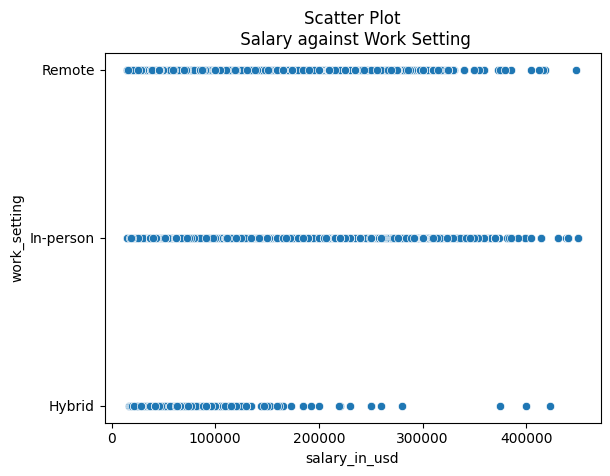

In [44]:
sns.scatterplot(x=df['salary_in_usd'], y=df['work_setting'],data=df)
plt.title('Scatter Plot\n Salary against Work Setting')
plt.show()

Observations  
- There are some outliers in every category

In [45]:
# Get outliers from every category
hybrid_outliers=df[(df['work_setting']=='Hybrid') & (df['salary_in_usd']>180000)]
inperson_outliers=df[(df['work_setting']=='In-person') & (df['salary_in_usd']>400000)]
remote_outliers=df[(df['work_setting']=='Remote') & (df['salary_in_usd']>330000)]

In [46]:
remote_outliers

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
706,2024,Mid-level,Full-time,Research Scientist,359400,USD,359400,United States,Remote,United States,M,Data Science and Research
1207,2024,Mid-level,Full-time,Research Scientist,359400,USD,359400,United States,Remote,United States,M,Data Science and Research
1911,2024,Executive,Full-time,Head of Machine Learning,448000,USD,448000,United States,Remote,United States,M,Machine Learning and AI
1912,2024,Executive,Full-time,Head of Machine Learning,373000,USD,373000,United States,Remote,United States,M,Machine Learning and AI
1945,2024,Senior,Full-time,Research Scientist,340000,USD,340000,United States,Remote,United States,M,Data Science and Research
2804,2024,Senior,Full-time,Machine Learning Engineer,418000,USD,418000,United States,Remote,United States,M,Machine Learning and AI
3279,2024,Senior,Full-time,Machine Learning Engineer,418000,USD,418000,United States,Remote,United States,M,Machine Learning and AI
4705,2023,Executive,Full-time,Data Engineer,350000,USD,350000,United States,Remote,United States,M,Data Engineering
5732,2023,Senior,Full-time,Data Architect,354200,USD,354200,United States,Remote,United States,M,Data Architecture and Modeling
7466,2023,Executive,Full-time,Director of Data Science,375500,USD,375500,United States,Remote,United States,M,Data Science and Research


In [47]:
inperson_outliers

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
110,2024,Mid-level,Full-time,Research Engineer,440000,USD,440000,United States,In-person,United States,M,Data Science and Research
1065,2024,Mid-level,Full-time,Research Engineer,440000,USD,440000,United States,In-person,United States,M,Data Science and Research
1394,2024,Mid-level,Full-time,ML Engineer,440000,USD,440000,United States,In-person,United States,M,Machine Learning and AI
1870,2024,Mid-level,Full-time,Research Engineer,440000,USD,440000,United States,In-person,United States,M,Data Science and Research
1897,2024,Senior,Full-time,Research Scientist,440000,USD,440000,United States,In-person,United States,M,Data Science and Research
1939,2024,Executive,Full-time,Head of Machine Learning,438000,USD,438000,United States,In-person,United States,M,Machine Learning and AI
2396,2024,Senior,Full-time,Machine Learning Engineer,414000,USD,414000,United States,In-person,United States,M,Machine Learning and AI
2592,2024,Mid-level,Full-time,Research Engineer,440000,USD,440000,United States,In-person,United States,M,Data Science and Research
2996,2024,Mid-level,Full-time,Research Scientist,440000,USD,440000,United States,In-person,United States,M,Data Science and Research
3281,2024,Senior,Full-time,Research Engineer,440000,USD,440000,United States,In-person,United States,M,Data Science and Research


In [48]:
hybrid_outliers

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
3283,2024,Executive,Full-time,Managing Director Data Science,260000,USD,260000,United States,Hybrid,United States,L,Data Science and Research
8958,2021,Senior,Full-time,Staff Machine Learning Engineer,185000,USD,185000,United States,Hybrid,United States,M,Machine Learning and AI
9782,2023,Senior,Full-time,Analytics Engineering Manager,325000,GBP,399880,United Kingdom,Hybrid,United Kingdom,L,Leadership and Management
9820,2023,Mid-level,Full-time,Research Scientist,280000,USD,280000,United Kingdom,Hybrid,United Kingdom,L,Data Science and Research
10657,2023,Entry-level,Full-time,Research Scientist,220000,USD,220000,United States,Hybrid,United States,L,Data Science and Research
12207,2023,Mid-level,Full-time,Machine Learning Engineer,219000,USD,219000,United States,Hybrid,United States,L,Machine Learning and AI
12547,2022,Entry-level,Full-time,AI Scientist,200000,USD,200000,Canada,Hybrid,Canada,L,Machine Learning and AI
12868,2022,Senior,Full-time,Data Science Tech Lead,375000,USD,375000,United States,Hybrid,United States,L,Data Science and Research
13555,2021,Senior,Full-time,Cloud Data Architect,250000,USD,250000,United States,Hybrid,United States,L,Data Architecture and Modeling
13908,2022,Executive,Full-time,Director of Data Science,250000,CAD,192037,Canada,Hybrid,Canada,L,Data Science and Research


In [49]:
# drop outliers
df.drop(remote_outliers.index,inplace=True)
df.drop(hybrid_outliers.index,inplace=True)
df.drop(inperson_outliers.index,inplace=True)


Text(0.5, 1.0, 'Scatter Plot\n Salary against Work Setting')

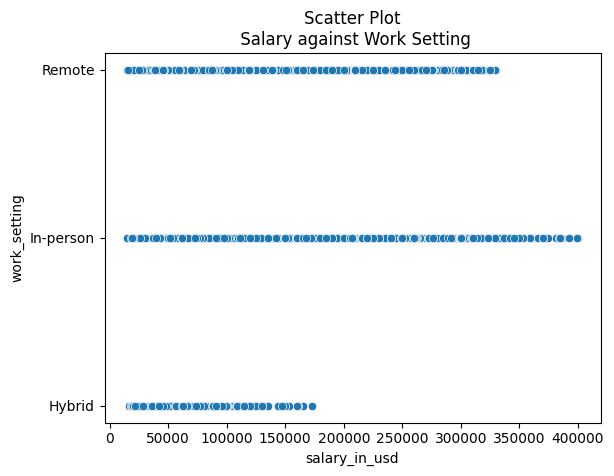

In [50]:
sns.scatterplot(x=df['salary_in_usd'], y=df['work_setting'],data=df)
plt.title('Scatter Plot\n Salary against Work Setting')

Observations  
- There are some outliers that need dropping

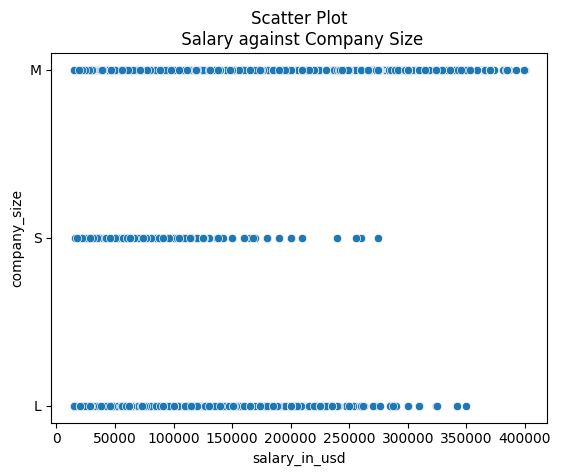

In [51]:

sns.scatterplot(x=df['salary_in_usd'], y=df['company_size'],data=df)
plt.title('Scatter Plot\n Salary against Company Size')
plt.show()

In [52]:
# Get outliers
s_outliers=df[(df['company_size']=='S') & (df['salary_in_usd']>150000)]
l_outliers=df[(df['company_size']=='L') & (df['salary_in_usd']>290000)]



In [53]:
s_outliers

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
7411,2023,Mid-level,Full-time,Machine Learning Engineer,170000,USD,170000,United States,In-person,United States,S,Machine Learning and AI
7552,2023,Mid-level,Full-time,Machine Learning Researcher,210000,USD,210000,United States,In-person,United States,S,Machine Learning and AI
9738,2023,Senior,Full-time,Data Scientist,240000,USD,240000,United States,In-person,United States,S,Data Science and Research
9740,2023,Mid-level,Contract,Machine Learning Engineer,180000,USD,180000,United States,Remote,United States,S,Machine Learning and AI
10169,2023,Mid-level,Full-time,Staff Data Analyst,179998,USD,179998,Saudi Arabia,Remote,Saudi Arabia,S,Data Analysis
10865,2022,Senior,Full-time,AI Developer,275000,USD,275000,Canada,In-person,Canada,S,Machine Learning and AI
11438,2023,Mid-level,Full-time,Machine Learning Scientist,200000,USD,200000,United States,In-person,United States,S,Machine Learning and AI
12074,2023,Senior,Full-time,Computer Vision Engineer,200000,USD,200000,United States,Remote,United States,S,Machine Learning and AI
13077,2022,Senior,Full-time,Marketing Data Analyst,200000,USD,200000,United Kingdom,Remote,United Kingdom,S,Data Analysis
13079,2022,Senior,Full-time,Data Science Lead,165000,USD,165000,United States,Hybrid,United States,S,Data Science and Research


In [54]:
l_outliers

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
710,2024,Senior,Full-time,Data Science,324100,USD,324100,United States,In-person,United States,L,Data Science and Research
7507,2023,Senior,Full-time,Applied Scientist,309400,USD,309400,United States,In-person,United States,L,Data Science and Research
9243,2023,Senior,Full-time,Applied Scientist,309400,USD,309400,United States,In-person,United States,L,Data Science and Research
9422,2023,Senior,Full-time,Applied Scientist,309400,USD,309400,United States,In-person,United States,L,Data Science and Research
9467,2020,Executive,Full-time,Managing Director Data Science,300000,USD,300000,United States,Remote,United States,L,Data Science and Research
9577,2023,Senior,Full-time,Applied Scientist,309400,USD,309400,United States,In-person,United States,L,Data Science and Research
9721,2023,Senior,Full-time,Applied Scientist,309400,USD,309400,United States,In-person,United States,L,Data Science and Research
10614,2023,Senior,Full-time,Applied Scientist,309400,USD,309400,United States,In-person,United States,L,Data Science and Research
10677,2023,Senior,Full-time,Machine Learning Engineer,342300,USD,342300,United States,In-person,United States,L,Machine Learning and AI
10706,2023,Senior,Full-time,Applied Scientist,309400,USD,309400,United States,In-person,United States,L,Data Science and Research


In [55]:
# Drop outliers
df.drop(s_outliers.index, inplace=True)
df.drop(l_outliers.index, inplace=True)



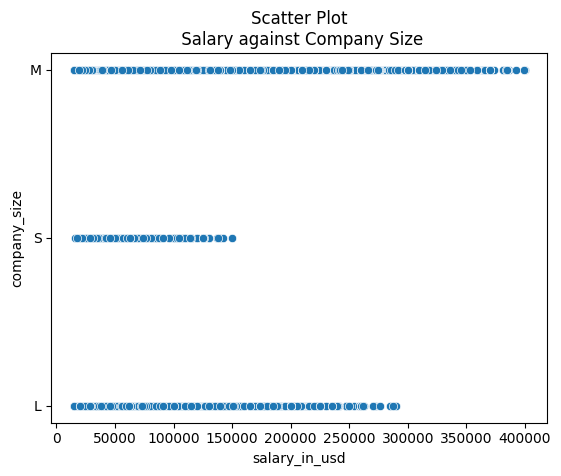

In [56]:
sns.scatterplot(x=df['salary_in_usd'], y=df['company_size'],data=df)
plt.title('Scatter Plot\n Salary against Company Size')
plt.show()

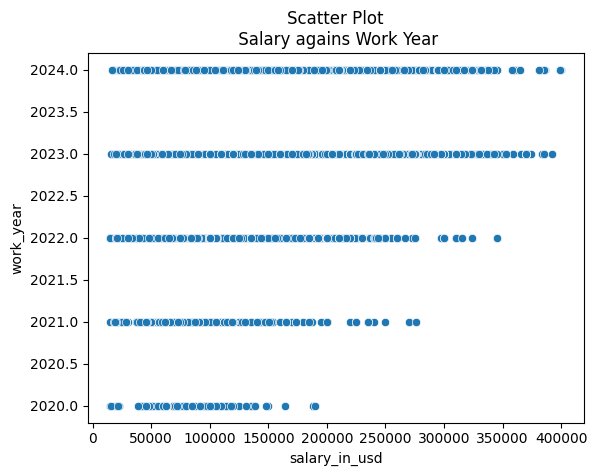

In [57]:
sns.scatterplot(x=df['salary_in_usd'], y=df['work_year'],data=df)
plt.title('Scatter Plot\n Salary agains Work Year')
plt.show()

In [58]:
# Get outliers
outliers_2020 = df[((df['work_year'] == 2020) & (df['salary_in_usd'] >= 140000)) | ((df['work_year'] == 2020) & (df['salary_in_usd'] < 25000))]
outliers_2021=df[(df['work_year']==2021) & (df['salary_in_usd']>=200000)]
outliers_2022=df[(df['work_year']==2022) & (df['salary_in_usd']>=270000)]
outliers_2023=df[(df['work_year']==2023) & (df['salary_in_usd']>=390000)]
outliers_2024=df[(df['work_year']==2024) & (df['salary_in_usd']>=370000)]

In [59]:
outliers_2020

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
8959,2020,Senior,Full-time,Staff Data Scientist,164000,USD,164000,United States,Hybrid,United States,M,Data Science and Research
10726,2020,Executive,Full-time,Staff Data Analyst,15000,USD,15000,Nigeria,In-person,Canada,M,Data Analysis
13627,2020,Entry-level,Full-time,Data Analyst,20000,EUR,22809,Portugal,Remote,Portugal,M,Data Analysis
13939,2020,Mid-level,Full-time,Product Data Analyst,20000,USD,20000,Honduras,In-person,Honduras,S,Data Analysis
14049,2020,Entry-level,Part-time,ML Engineer,14000,EUR,15966,Germany,Remote,Germany,S,Machine Learning and AI
14055,2020,Senior,Full-time,Data Engineer,188000,USD,188000,United States,Remote,United States,L,Data Engineering
14090,2020,Senior,Full-time,Machine Learning Engineer,150000,USD,150000,United States,Hybrid,United States,L,Machine Learning and AI
14159,2020,Entry-level,Part-time,Data Scientist,19000,EUR,21669,Italy,Hybrid,Italy,S,Data Science and Research
14174,2020,Senior,Full-time,Principal Data Scientist,130000,EUR,148261,Germany,Remote,Germany,M,Data Science and Research
14185,2020,Senior,Full-time,Data Science Manager,190200,USD,190200,United States,Remote,United States,M,Data Science and Research


In [60]:
outliers_2021

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
13949,2021,Senior,Full-time,Data Science Manager,240000,USD,240000,United States,In-person,United States,L,Data Science and Research
13958,2021,Senior,Full-time,Principal Data Scientist,220000,USD,220000,United States,In-person,United States,L,Data Science and Research
13979,2021,Senior,Full-time,Principal Data Engineer,200000,USD,200000,United States,Remote,United States,M,Data Engineering
13981,2021,Mid-level,Full-time,Data Engineer,200000,USD,200000,United States,Remote,United States,L,Data Engineering
13991,2021,Executive,Full-time,Director of Data Science,250000,USD,250000,United States,In-person,United States,L,Data Science and Research
14014,2021,Mid-level,Contract,ML Engineer,270000,USD,270000,United States,Remote,United States,L,Machine Learning and AI
14032,2021,Executive,Full-time,Head of Data,235000,USD,235000,United States,Remote,United States,L,Leadership and Management
14035,2021,Entry-level,Full-time,Machine Learning Scientist,225000,USD,225000,United States,Remote,United States,L,Machine Learning and AI
14054,2021,Senior,Full-time,Lead Data Engineer,276000,USD,276000,United States,In-person,United States,L,Data Engineering
14058,2021,Mid-level,Full-time,Data Engineer,200000,USD,200000,United States,Remote,United States,L,Data Engineering


In [61]:
outliers_2022

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
12375,2022,Senior,Full-time,Data Scientist,272550,USD,272550,United States,Remote,United States,M,Data Science and Research
12449,2022,Executive,Full-time,Data Engineer,310000,USD,310000,United States,Remote,United States,M,Data Engineering
12673,2022,Senior,Full-time,Data Engineer,300000,USD,300000,United States,In-person,United States,M,Data Engineering
12789,2022,Executive,Full-time,Data Engineer,310000,USD,310000,United States,Remote,United States,M,Data Engineering
12791,2022,Senior,Full-time,Data Science Manager,299500,USD,299500,United States,In-person,United States,M,Data Science and Research
12841,2022,Senior,Full-time,Research Scientist,300000,USD,300000,United States,Remote,United States,M,Data Science and Research
12914,2022,Senior,Full-time,Data Engineer,315000,USD,315000,United States,Remote,United States,M,Data Engineering
12984,2022,Senior,Full-time,Data Engineer,275000,USD,275000,United States,Remote,United States,M,Data Engineering
13009,2022,Senior,Full-time,Data Engineer,300000,USD,300000,United States,In-person,United States,M,Data Engineering
13062,2022,Senior,Full-time,Data Architect,345600,USD,345600,United States,In-person,United States,M,Data Architecture and Modeling


In [62]:
outliers_2023

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
9111,2023,Senior,Full-time,Machine Learning Engineer,392000,USD,392000,United States,In-person,United States,M,Machine Learning and AI


In [63]:
outliers_2024

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
936,2024,Mid-level,Full-time,Data Infrastructure Engineer,385000,USD,385000,United States,In-person,United States,M,Data Engineering
1455,2024,Senior,Full-time,AI Engineer,385000,USD,385000,United States,In-person,United States,M,Machine Learning and AI
1586,2024,Mid-level,Full-time,AI Engineer,400000,USD,400000,United States,In-person,United States,M,Machine Learning and AI
1937,2024,Senior,Full-time,Data Analytics Lead,398900,USD,398900,United States,In-person,United States,M,Leadership and Management
2080,2024,Senior,Full-time,Data Analytics Lead,398900,USD,398900,United States,In-person,United States,M,Leadership and Management
2186,2024,Senior,Full-time,Research Scientist,382320,USD,382320,United States,In-person,United States,M,Data Science and Research
2604,2024,Senior,Full-time,Machine Learning Engineer,386100,USD,386100,United States,In-person,United States,M,Machine Learning and AI
3046,2024,Executive,Full-time,Data Science,381500,USD,381500,United States,In-person,United States,M,Data Science and Research
3320,2024,Senior,Full-time,Data Engineer,385000,USD,385000,United States,In-person,United States,M,Data Engineering
3322,2024,Mid-level,Full-time,Data Scientist,385000,USD,385000,United States,In-person,United States,M,Data Science and Research


In [64]:
# Drop outliers
df.drop(outliers_2020.index, inplace=True)
df.drop(outliers_2021.index, inplace=True)
df.drop(outliers_2022.index, inplace=True)
df.drop(outliers_2023.index, inplace=True)
df.drop(outliers_2024.index, inplace=True)


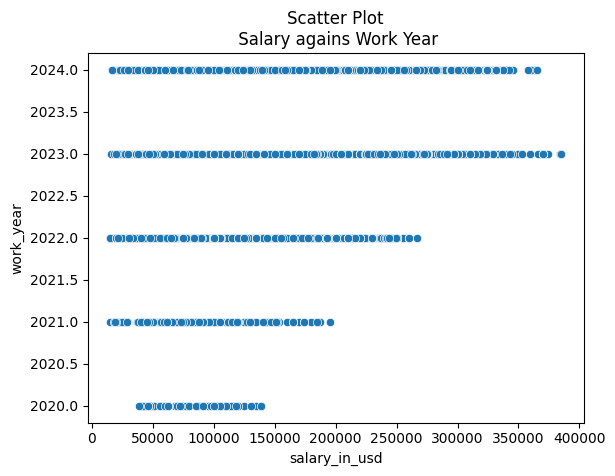

In [65]:
sns.scatterplot(x=df['salary_in_usd'], y=df['work_year'],data=df)
plt.title('Scatter Plot\n Salary agains Work Year')
plt.show()

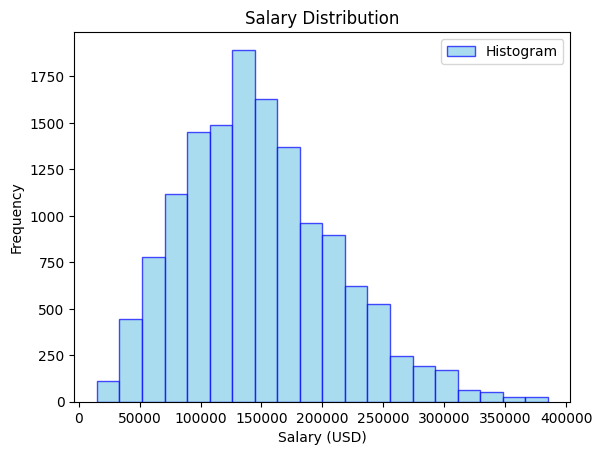

In [66]:
# Plot histogram
df['salary_in_usd'].plot.hist(bins=20, edgecolor='blue', color='skyblue', alpha=0.7, label='Histogram')
# Add labels and legend
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.title('Salary Distribution')
plt.legend()

# Show plot
plt.show()


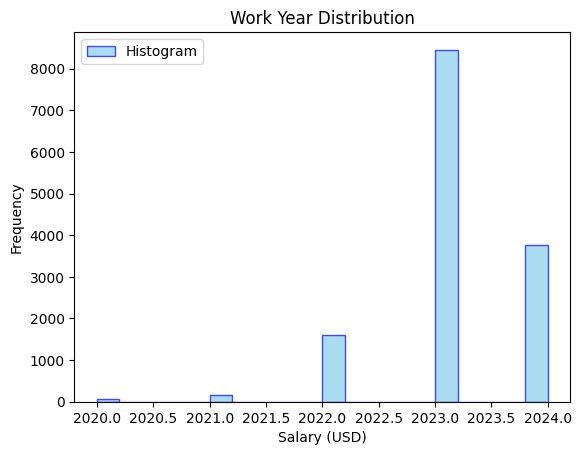

In [67]:
# Plot histogram
df['work_year'].plot.hist(bins=20, edgecolor='blue', color='skyblue', alpha=0.7, label='Histogram')
# Add labels and legend
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.title('Work Year Distribution')
plt.legend()

# Show plot
plt.show()


# Data Cleaning

In [68]:
# Drop irrelevant columns salary_currency and salary
# we only need salary_in_usd
df=df.drop(['salary_currency','salary'], axis =1)

## Observations  
- There having no unique identifiers in our dataset, no duplicates

# Analytical Questions

## 1. Does company size affect salary?


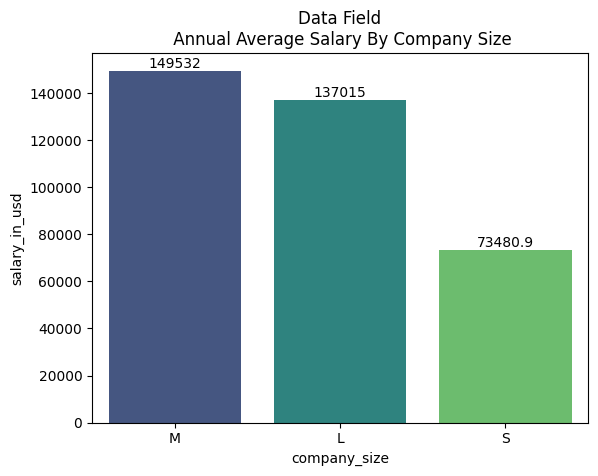

In [69]:
# plot bar plot to campare company size and average salary
average_salary_company_size=df.groupby('company_size')['salary_in_usd'].mean().sort_values(ascending=False)
average_salary_company_size=pd.DataFrame(average_salary_company_size)
ax=sns.barplot(x='company_size', y='salary_in_usd', data=average_salary_company_size,palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Data Field\n Annual Average Salary By Company Size')
plt.show()

### Observations  
- Employees working in Medium sized companies receive higher salary on avaerage than those working for Large and Small sized companies
- Large companies are slighlty behind Medium companies with small companies coming last
- Clearly, company size does affect the pay

## 2. How does salary vary across work settings?


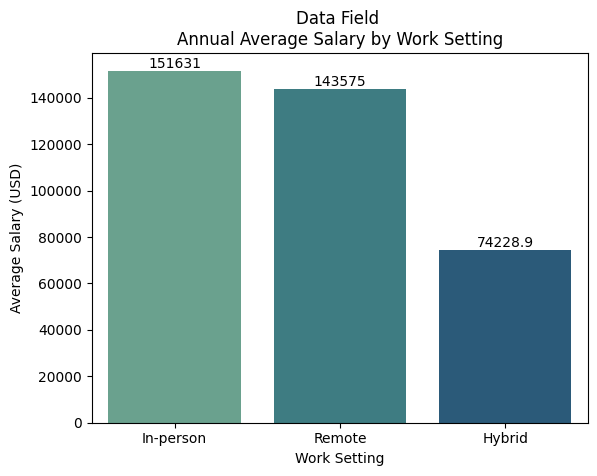

In [70]:
work_setting_salary=df.groupby('work_setting')['salary_in_usd'].mean().sort_values(ascending=False)
work_setting_salary_df=pd.DataFrame(work_setting_salary)
ax=sns.barplot(x='work_setting', y='salary_in_usd', data=work_setting_salary_df, palette='crest')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Data Field \nAnnual Average Salary by Work Setting')
plt.ylabel('Average Salary (USD)')
plt.xlabel('Work Setting')
plt.show()


### Observations  
- The best paid work setting on average is In person 
- Remote is second and hybrid last
- Clearly, work setting does affect the pay

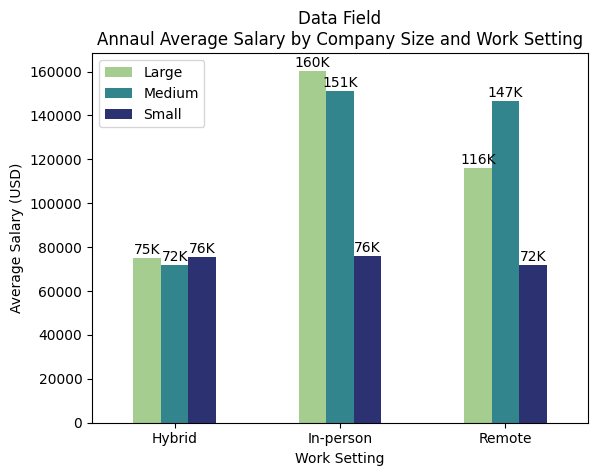

In [71]:
average_salary_setting_companysize=df.groupby(['work_setting','company_size'])['salary_in_usd'].mean().sort_values(ascending=False)
average_salary_setting_companysize_df=pd.DataFrame(average_salary_setting_companysize)
qx=average_salary_setting_companysize_df.unstack().plot.bar(colormap='crest')
plt.title('Data Field\nAnnaul Average Salary by Company Size and Work Setting')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.xlabel('Work Setting')
plt.legend(['Large', 'Medium', 'Small'])
for index, bar in enumerate(qx.patches):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 500, f'{height/1000:.0f}K', ha='center', va='bottom')
plt.show()

## 3. How does salary vary with employment type?


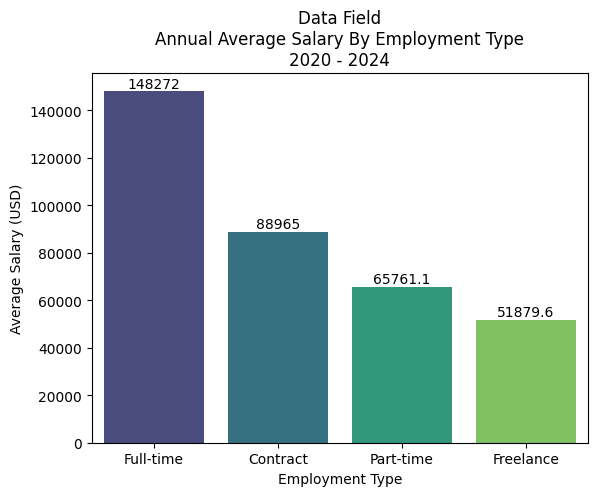

In [72]:
employment_type_salary_avg=df.groupby('employment_type')['salary_in_usd'].mean().sort_values(ascending=False)
employment_type_salary_avg_df=pd.DataFrame(employment_type_salary_avg)
kx=sns.barplot(x='employment_type', y='salary_in_usd', data=employment_type_salary_avg_df,palette='viridis')
for k in kx.containers:
    kx.bar_label(k,)
plt.title('Data Field\nAnnual Average Salary By Employment Type\n2020 - 2024')
plt.xlabel('Employment Type')
plt.ylabel('Average Salary (USD)')
plt.show()


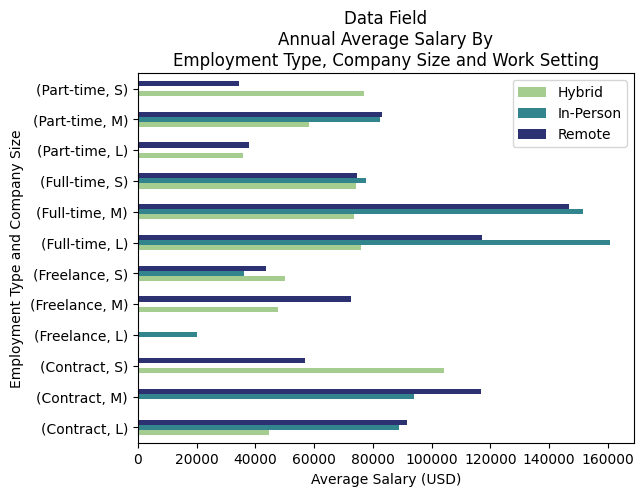

In [73]:
# unstacked barchart to show annual average salary by employment type, company size and worksetting
type_size_setting=df.groupby(['employment_type','company_size','work_setting'])['salary_in_usd'].mean().sort_values(ascending=False)
type_size_setting_df=pd.DataFrame(type_size_setting)
type_size_setting_df.unstack().plot.barh(colormap='crest')
plt.legend(['Hybrid','In-Person','Remote'])
plt.title('Data Field\nAnnual Average Salary By\nEmployment Type, Company Size and Work Setting')
plt.ylabel('Employment Type and Company Size')
plt.xlabel('Average Salary (USD)')
plt.show()


### Observations 
- Fulltime is the best paid employemet with a little short of   150k on average yearly
- Freelancing is the least with around an average of 51k yearly

## 5. How does salary vary with company location?


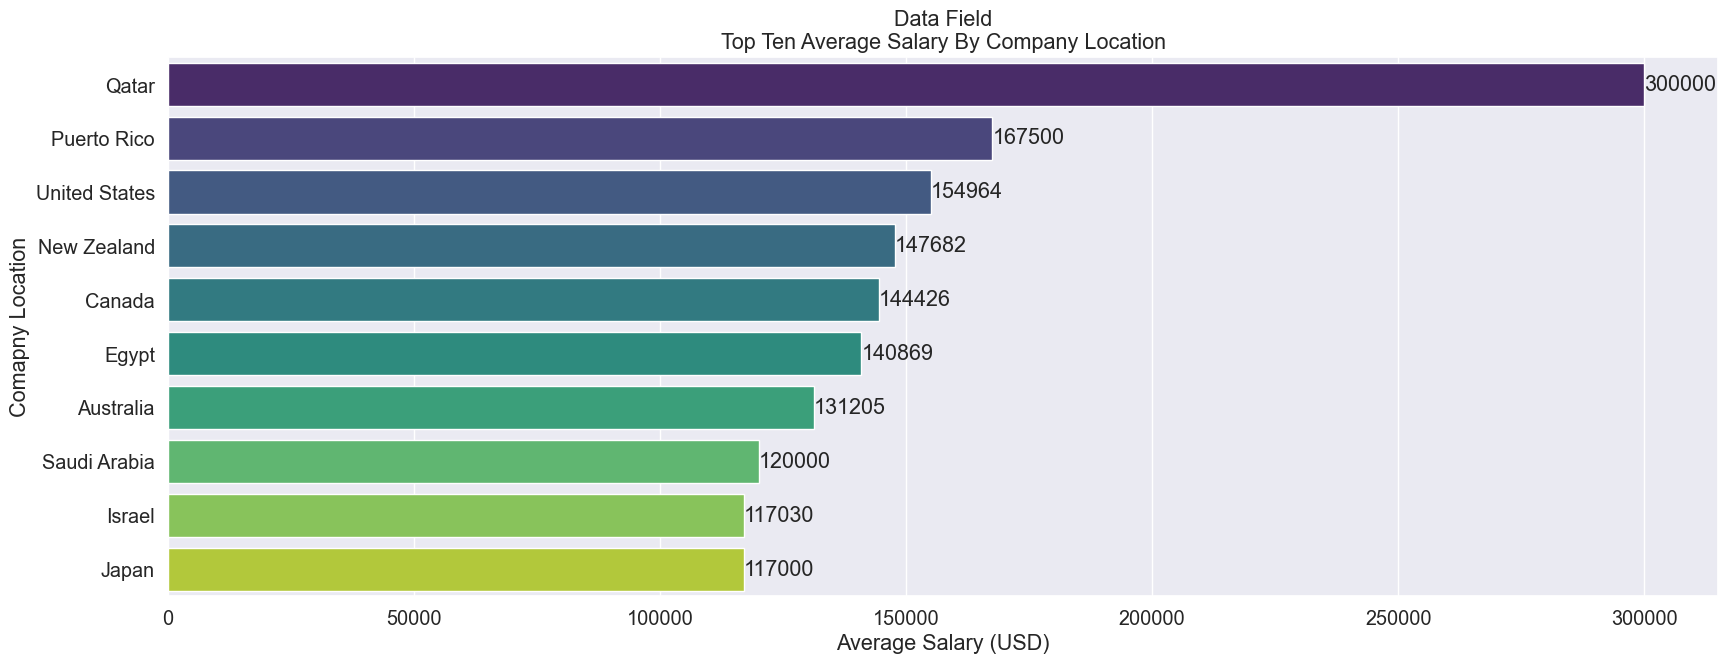

In [85]:
# plot horizontal bargraph
salary_company_location=df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
salary_company_location_df=pd.DataFrame(salary_company_location)
sns.set(rc = {'figure.figsize':(20,7)})
sns.set(font_scale=1.3)
t=sns.barplot(x='salary_in_usd',y='company_location', data=salary_company_location_df,palette='viridis')
plt.xticks(rotation=0)
plt.title('Data Field\nTop Ten Average Salary By Company Location')
plt.xlabel('Average Salary (USD)')
plt.ylabel('Comapny Location')
for t in t.containers:
    plt.bar_label(t,)
plt.show()

In [75]:
qatar=df[df['company_location'].isin(['Qatar','Puerto Rico'])]
qatar

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
7870,2023,Mid-level,Full-time,AI Engineer,300000,Qatar,Remote,Qatar,M,Machine Learning and AI
13264,2022,Senior,Full-time,Machine Learning Engineer,200000,Puerto Rico,Remote,Puerto Rico,M,Machine Learning and AI
13265,2022,Senior,Full-time,Machine Learning Engineer,135000,Puerto Rico,Remote,Puerto Rico,M,Machine Learning and AI
13505,2022,Senior,Full-time,Data Engineer,200000,Puerto Rico,Remote,Puerto Rico,M,Data Engineering
13506,2022,Senior,Full-time,Data Engineer,135000,Puerto Rico,Remote,Puerto Rico,M,Data Engineering


## Best countries in remote work 

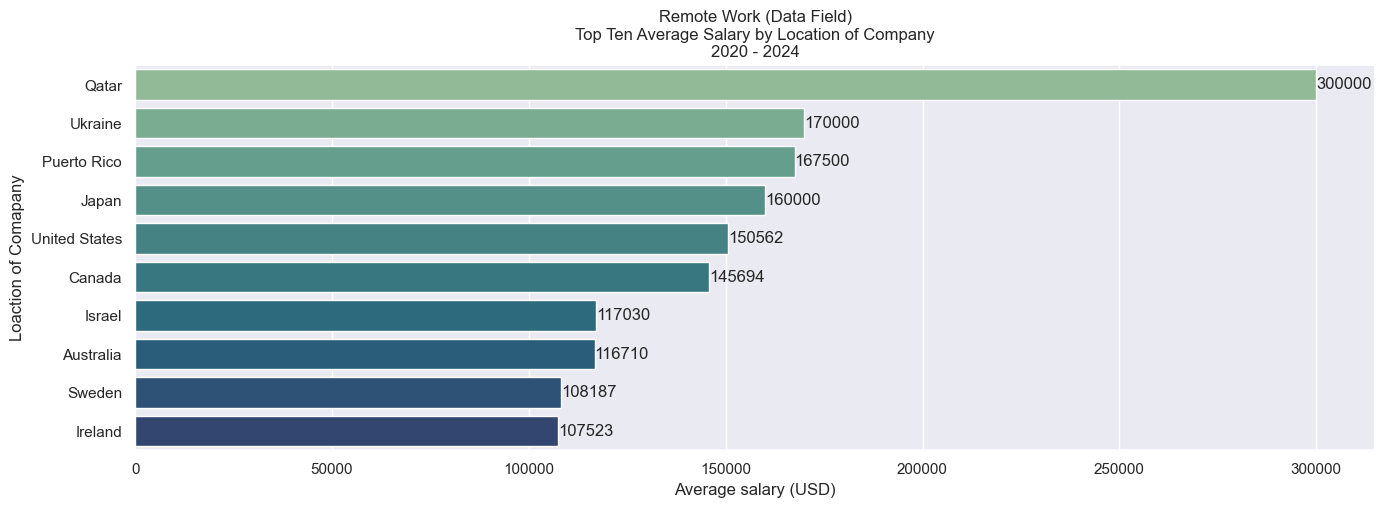

In [76]:
# Get all remote job settings
remote_work=df[df['work_setting']=='Remote']
remote_work_=remote_work.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
remote_work_df=pd.DataFrame(remote_work_)
sns.set(rc = {'figure.figsize':(16,5)})
sns.set(font_scale=1)

ox=sns.barplot(x='salary_in_usd', y='company_location', data=remote_work_df.head(10),palette='crest')

for o in ox.containers:
    plt.bar_label(o,)
plt.title('Remote Work (Data Field)\nTop Ten Average Salary by Location of Company\n2020 - 2024')
plt.ylabel('Loaction of Comapany')
plt.xlabel('Average salary (USD)')
plt.show()


Observations  
- Ukraine is the best paying country on average in remote jobs
- United states comes third with 160k annualy

## Salary variation with experience level

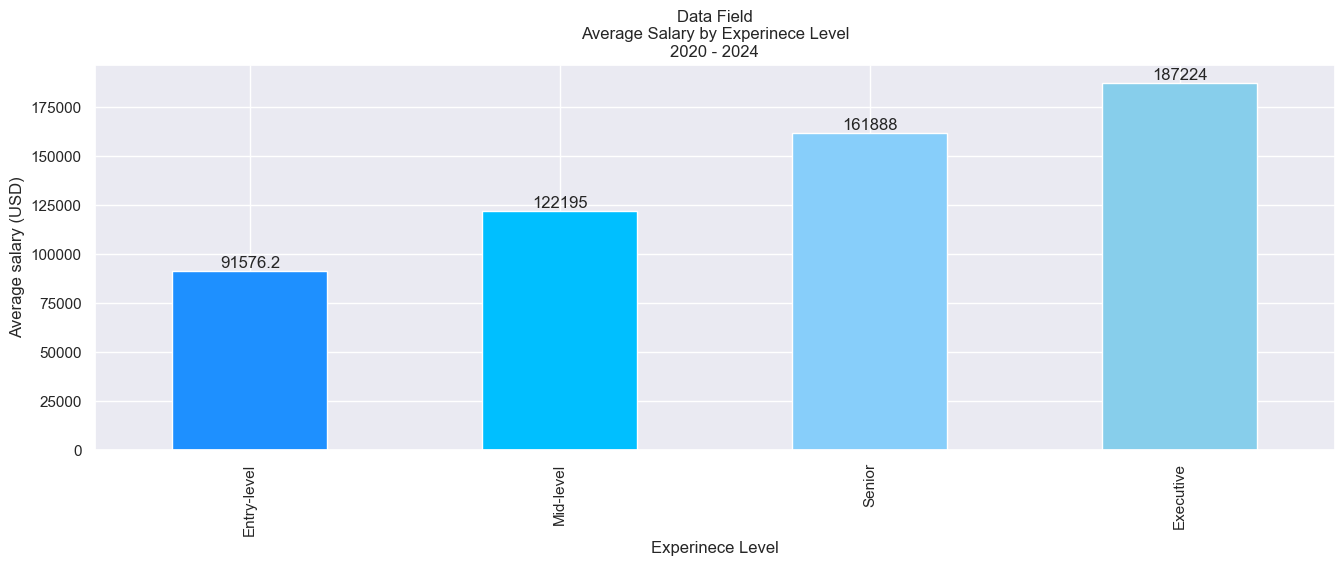

In [77]:
# barplot to show variation of salary with experinece level
experience=df.groupby('experience_level')['salary_in_usd'].mean().sort_values()
exp=experience.plot.bar(color=['dodgerblue','deepskyblue','lightskyblue','skyblue'])
sns.set(font_scale=1)
for container in exp.containers:
    exp.bar_label(container)
plt.ylabel('Average salary (USD)')
plt.xlabel('Experinece Level')
plt.title('Data Field\nAverage Salary by Experinece Level\n2020 - 2024')
plt.show()

Observations  
- On average, salary increase with amount of experience

## Salary variation with job category

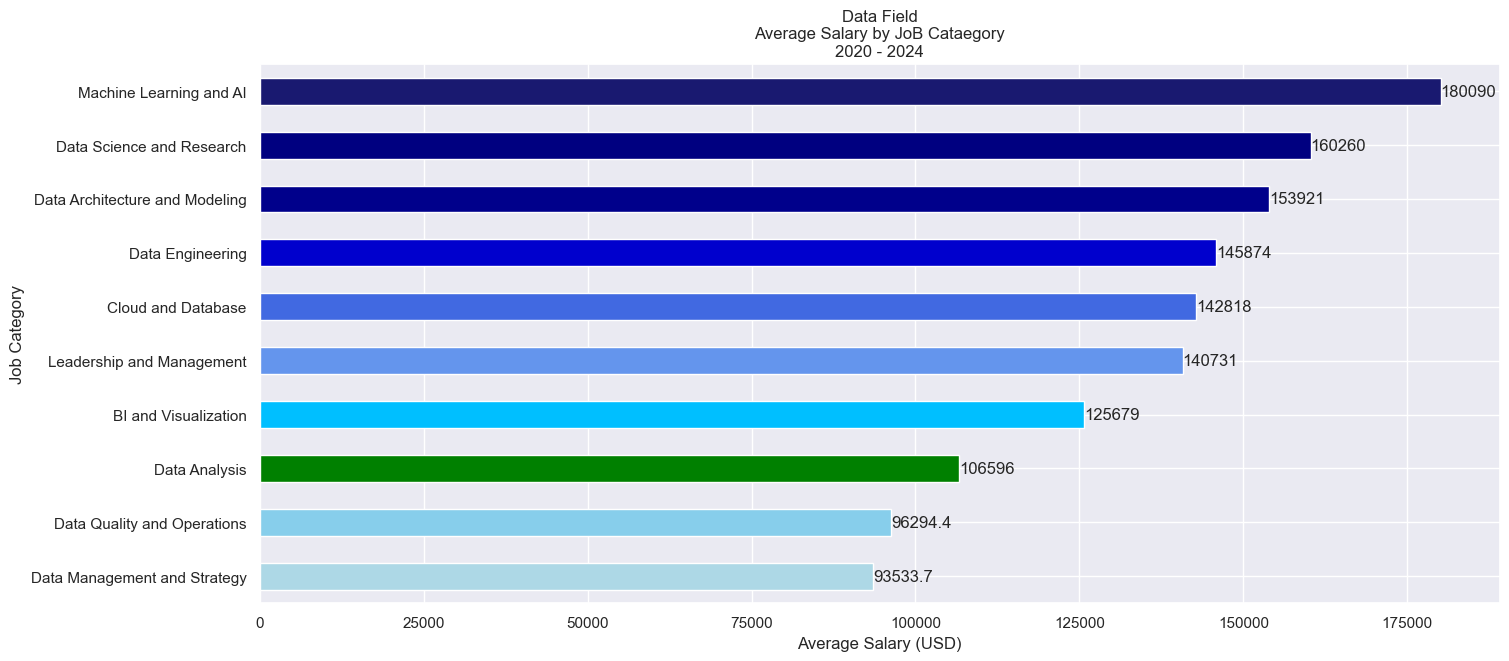

In [78]:
# barplot to show variation of annual salary with job category
job_category=df.groupby('job_category')['salary_in_usd'].mean().sort_values()
colors=['lightblue', 'skyblue', 'green', 'deepskyblue', 'cornflowerblue', 'royalblue', 'mediumblue', 'darkblue', 'navy', 'midnightblue']
sns.set(rc={'figure.figsize':(16,7)})
jx=job_category.plot.barh(color=colors)
for j in jx.containers:
    plt.bar_label(j,)
plt.title('Data Field\nAverage Salary by JoB Cataegory\n2020 - 2024')
plt.ylabel('Job Category')
plt.xlabel('Average Salary (USD)')
plt.show()


Observations:  
- Machine learning is the best paid categor on average with well over 180k annualy
- Data analysis is paid slightly over 105k 

## Entry Level salary across job categories

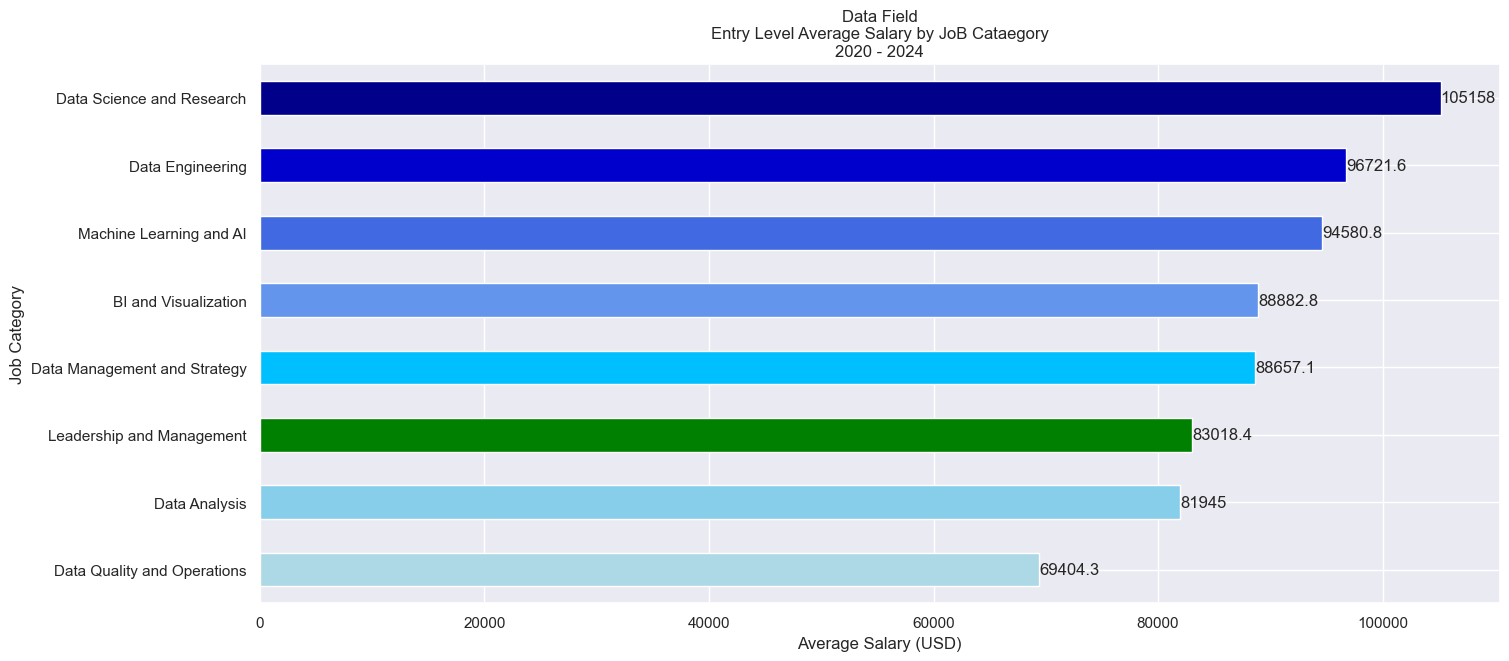

In [79]:
entry_level=df[df['experience_level']=='Entry-level']
entry_level_=pd.DataFrame(entry_level)
entry_level_df=entry_level_.groupby('job_category')['salary_in_usd'].mean().sort_values()
ex=entry_level_df.plot.barh(color=colors)
for e in ex.containers:
    plt.bar_label(e,)
plt.title('Data Field\nEntry Level Average Salary by JoB Cataegory\n2020 - 2024')
plt.ylabel('Job Category')
plt.xlabel('Average Salary (USD)')
plt.show()

Observations:  
- On average, all entry level positions in data field  have a salary less than 106k but above 69k


## Entry Level and remote work settings salary across job categories

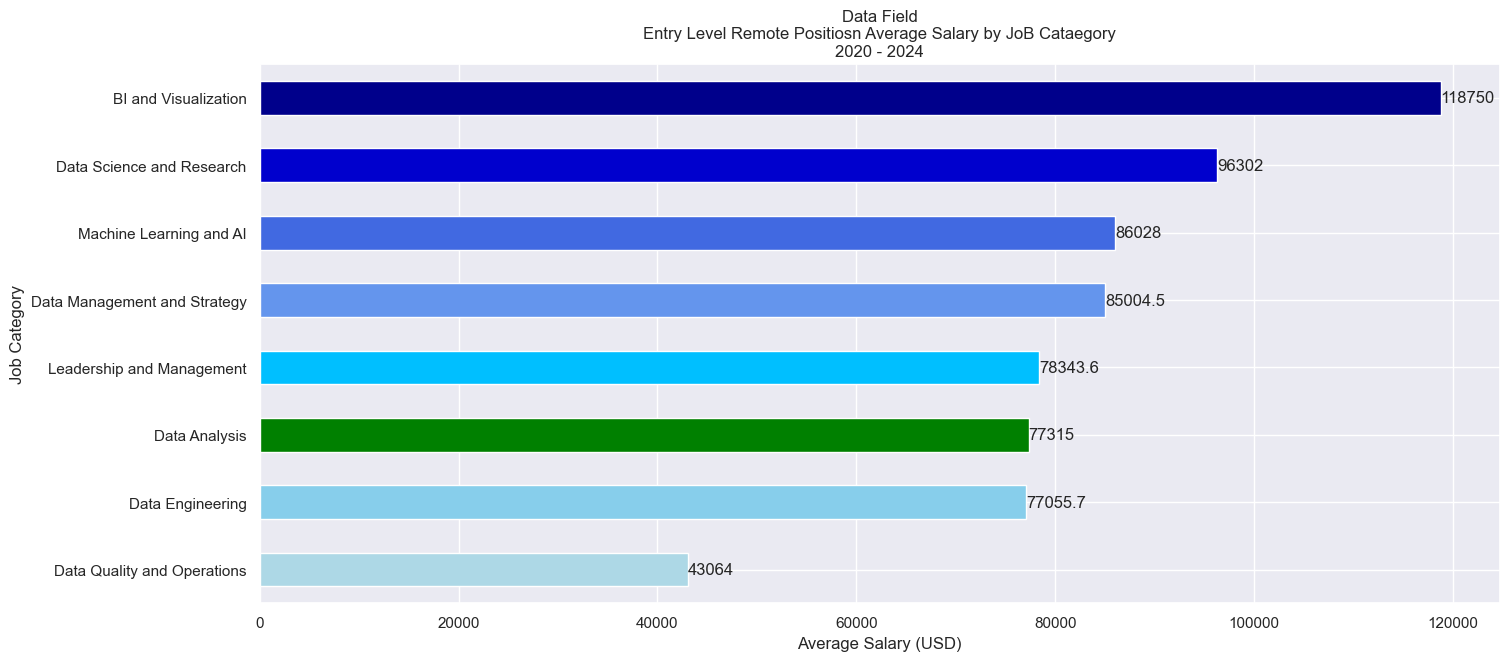

In [80]:
entry_level_remote=df[(df['experience_level']=='Entry-level') & (df['work_setting'] == 'Remote')]
entry_level_remote_=pd.DataFrame(entry_level_remote)
entry_level_remote_df=entry_level_remote_.groupby('job_category')['salary_in_usd'].mean().sort_values()
ex=entry_level_remote_df.plot.barh(color=colors)
for e in ex.containers:
    plt.bar_label(e,)
plt.title('Data Field\nEntry Level Remote Positiosn Average Salary by JoB Cataegory\n2020 - 2024')
plt.ylabel('Job Category')
plt.xlabel('Average Salary (USD)')
plt.show()